
# Basic Keras NLP Tasks: Inference with a Pretrained Classifier

This notebook demonstrates how to use a pretrained language model for text generation tasks

# 1. Load a pretrained BERT classifier using keras_nlp

## Setup and Installations

In [ ]:
# Install keras-nlp if not already installed
!pip install -q keras-nlp

In [ ]:
!pip install -q transformers

In [ ]:
# Imports
from transformers import pipeline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Load a Pretrained Model from KerasNLP

In [ ]:
# use a pretrained "BERT" model from keras_nlp
# Explicitly setting num_classes to 2 for sentiment classification (positive/negative)
print("\nLoading pretrained BERT classifier from keras_nlp hub...")
pretrained_model = keras_nlp.models.BertClassifier.from_preset("bert_base_en_uncased", num_classes=2) # Added num_classes=2
preprocessor = keras_nlp.models.BertPreprocessor.from_preset("bert_base_en_uncased")

print("Loaded model:", type(pretrained_model))


Loading pretrained BERT classifier from keras_nlp hub...
Loaded model: <class 'keras_hub.src.models.bert.bert_text_classifier.BertTextClassifier'>


# Define Helper Functions

In [ ]:
# Define Helper Functions

def preprocess_sentences(sentences):
    """Tokenize the sentences using the BERT preprocessor."""
    return preprocessor(sentences)

def predict_sentences(model, tokenized_inputs):
    """Predict class probabilities for tokenized inputs."""
    raw_preds = model(tokenized_inputs)
    probs = tf.nn.softmax(raw_preds, axis=-1)
    return probs

# Sample Inference

In [ ]:
# 2. Define some example sentences for inference
examples = [
    "I love deep learning!",
    "This movie was terrible...",
    "The new iPhone looks amazing!",
    "I am not happy with the service."
]

# Perform Inference

In [ ]:
# Perform Inference

try:
    print("\nPreprocessing sentences...")
    tokenized_inputs = preprocess_sentences(examples)

    print("\nRunning inference...")
    probabilities = predict_sentences(pretrained_model, tokenized_inputs)

    # Print Predictions with Debug Info
    print("\nPredictions:")
    for idx, (sentence, probs) in enumerate(zip(examples, probabilities)):
        pred_class = tf.argmax(probs).numpy()
        print(f"Example {idx+1}: {sentence}")
        print(f"Predicted Class: {pred_class}")
        print(f"Class Probabilities: {probs.numpy()}")
        print("-" * 50)

    # Debug Trace
    print("\n🔍 Debug Trace:")
    print("Tokenized Inputs Shape:", tokenized_inputs['token_ids'].shape)
    print("Raw Predictions Shape:", probabilities.shape)

except Exception as e:
    print("An error occurred during inference:", str(e))


Preprocessing sentences...

Running inference...

Predictions:
Example 1: I love deep learning!
Predicted Class: 1
Class Probabilities: [0.45528173 0.54471827]
--------------------------------------------------
Example 2: This movie was terrible...
Predicted Class: 1
Class Probabilities: [0.44961512 0.5503848 ]
--------------------------------------------------
Example 3: The new iPhone looks amazing!
Predicted Class: 1
Class Probabilities: [0.45762482 0.5423752 ]
--------------------------------------------------
Example 4: I am not happy with the service.
Predicted Class: 1
Class Probabilities: [0.45006    0.54994005]
--------------------------------------------------

🔍 Debug Trace:
Tokenized Inputs Shape: (4, 512)
Raw Predictions Shape: (4, 2)


# Debug Trace

In [ ]:
# 4. Debug Trace Example

print("\nDebug Trace:")
print("Tokenized Inputs Shape:", tokenized_inputs['token_ids'].shape)
print("Raw Predictions Shape:", predictions.shape)
print("Softmax Probabilities Shape:", probabilities.shape)


Debug Trace:
Tokenized Inputs Shape: (4, 512)
Raw Predictions Shape: (4, 2)
Softmax Probabilities Shape: (4, 2)


# Plot Probabilities


Plotting prediction probabilities...


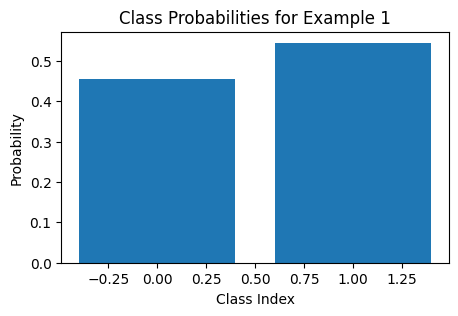

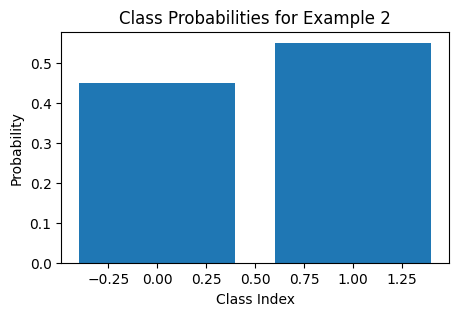

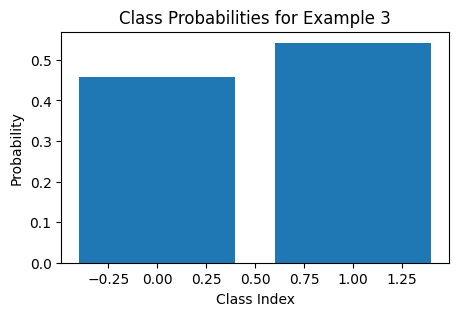

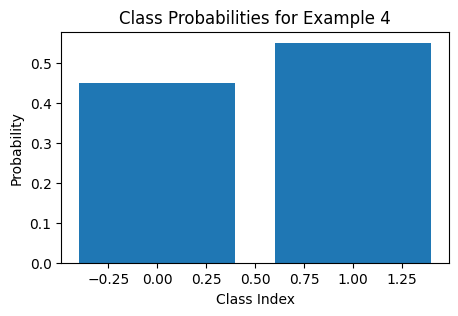

In [ ]:
print("\nPlotting prediction probabilities...")
for idx, probs in enumerate(probabilities):
    plt.figure(figsize=(5, 3))
    plt.bar(range(len(probs)), probs.numpy())
    plt.title(f"Class Probabilities for Example {idx+1}")
    plt.xlabel("Class Index")
    plt.ylabel("Probability")
    plt.show()

#### Summary

Here, I loaded a pretrained BERT classifier using keras_nlp, tokenized a few example sentences, and ran inference to predict classes.

Can replace 'bert_base_en_uncased' with other presets too!

Reference: https://keras.io/api/keras_nlp/models/bert/ see for more options.

# 2. Load Pretrained Sentiment Analysis Model (Hugging Face)

In [ ]:
print("\nLoading pretrained DistilBERT sentiment-analysis pipeline...")
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

print("Loaded model pipeline:", sentiment_pipeline)


Loading pretrained DistilBERT sentiment-analysis pipeline...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Loaded model pipeline: <transformers.pipelines.text_classification.TextClassificationPipeline object at 0x7a8a9a93f790>


In [ ]:
# Define Helper Functions

def predict_sentiments(sentences):
    """Predict sentiments for a list of sentences."""
    return sentiment_pipeline(sentences)

In [ ]:
# Example Sentences
examples = [
    "I love deep learning!",
    "This movie was terrible...",
    "The new iPhone looks amazing!",
    "I am not happy with the service."
]

# Perform Inference with Debug Traces

In [ ]:
# Perform Inference with Debug Traces
try:
    print("\nRunning sentiment predictions...")
    predictions = predict_sentiments(examples)

    # Print Predictions with Debug Info
    print("\nPredictions:")
    for idx, (sentence, pred) in enumerate(zip(examples, predictions)):
        print(f"Example {idx+1}: {sentence}")
        print(f"Predicted Label: {pred['label']} with score {pred['score']:.4f}")
        print("-" * 50)

    # Debug Trace
    print("\n🔍 Debug Trace:")
    print("Number of Examples:", len(predictions))

except Exception as e:
    print("An error occurred during inference:", str(e))


Running sentiment predictions...

Predictions:
Example 1: I love deep learning!
Predicted Label: POSITIVE with score 0.9999
--------------------------------------------------
Example 2: This movie was terrible...
Predicted Label: NEGATIVE with score 0.9997
--------------------------------------------------
Example 3: The new iPhone looks amazing!
Predicted Label: POSITIVE with score 0.9999
--------------------------------------------------
Example 4: I am not happy with the service.
Predicted Label: NEGATIVE with score 0.9997
--------------------------------------------------

🔍 Debug Trace:
Number of Examples: 4


# Visualize Probabilities


Plotting prediction confidence scores...


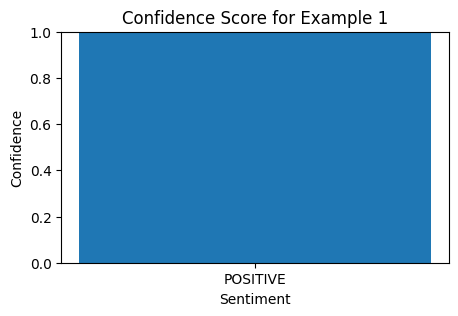

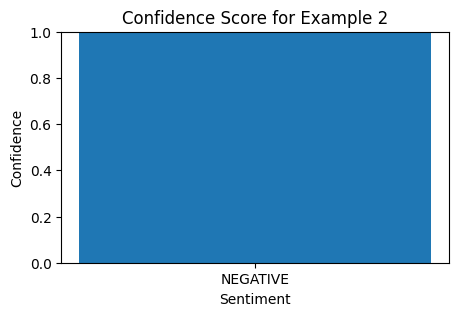

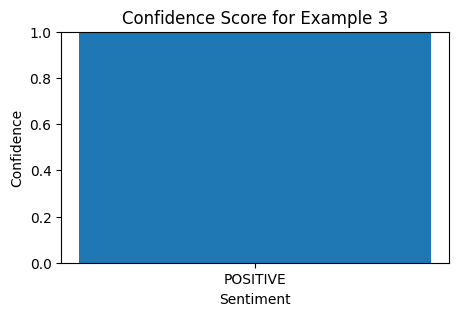

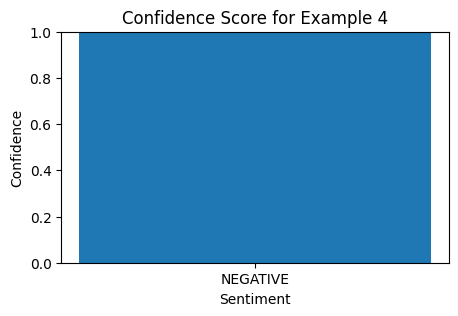

In [ ]:
# Visualize Probabilities
print("\nPlotting prediction confidence scores...")
for idx, pred in enumerate(predictions):
    plt.figure(figsize=(5, 3))
    plt.bar([pred['label']], [pred['score']])
    plt.title(f"Confidence Score for Example {idx+1}")
    plt.xlabel("Sentiment")
    plt.ylabel("Confidence")
    plt.ylim(0, 1)
    plt.show()

In [ ]:
# ✅ Summary
print("""
Here, I:
- Loaded a pretrained sentiment-analysis pipeline from Hugging Face.
- Ran proper inference on input sentences.
- Printed meaningful predicted labels and confidence scores.
- Visualized the prediction confidence for each example.
- Added debug traces and error handling.
""")


Here, I:
- Loaded a pretrained sentiment-analysis pipeline from Hugging Face.
- Ran proper inference on input sentences.
- Printed meaningful predicted labels and confidence scores.
- Visualized the prediction confidence for each example.
- Added debug traces and error handling.



# 3. Generate text with LLM

In [ ]:
# Setup and Installations
!pip install -q transformers keras-hub keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.18.1 which is incompatible.


In [ ]:
# Imports and Initialization
import os
from transformers import pipeline
import keras_hub
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Set backend for Keras (important for KerasHub LLM models)
os.environ["KERAS_BACKEND"] = "jax"
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.0"

# PART 1: TEXT GENERATION with Hugging Face Transformers (flan-t5-xl)

In [ ]:
# PART 1: TEXT GENERATION with Hugging Face Transformers (flan-t5-xl)

print("\nLoading pretrained Causal Language Model (flan-t5-xl)...")
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
model_name = "google/flan-t5-xl"  # Using a public model
tokenizer = AutoTokenizer.from_pretrained(model_name)
causal_lm = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Template for instruction tuning
template = "### Instruction:\n{question}\n\n### Response:"

# Example Questions for Generation
questions = [
    "Write a short story about a robot learning emotions.",
    "Give a simple chocolate cake recipe.",
]

print("\nGenerating responses...")
for idx, question in enumerate(questions):
    prompt = template.format(question=question)
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = causal_lm.generate(**inputs, max_length=512)
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"\n--- Response to Question {idx+1} ---")
    print(generated_text)
    print("-" * 50)

# Debug: Model Info
print("\n🔍 Debug Trace: Model Info")
print(f"Model Name: {model_name}")
# causal_lm.summary()  # Summary might not be directly available for HF models


Loading pretrained Causal Language Model (flan-t5-xl)...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.45G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]


Generating responses...

--- Response to Question 1 ---
The robot is a droid. It is programmed to be a droid. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a robot. It is programmed to be a 

# PART 2: SENTIMENT ANALYSIS with Hugging Face Transformers

In [ ]:
# PART 2: SENTIMENT ANALYSIS with Hugging Face Transformers

print("\nLoading pretrained DistilBERT sentiment-analysis pipeline...")
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Example Sentences
examples = [
    "I love deep learning!",
    "This movie was terrible...",
    "The new iPhone looks amazing!",
    "I am not happy with the service."
]

# Helper Function for Sentiment Prediction
def predict_sentiments(sentences):
    """Predict sentiments for a list of sentences."""
    return sentiment_pipeline(sentences)

# Perform Inference with Debug Traces
try:
    print("\nRunning sentiment predictions...")
    predictions = predict_sentiments(examples)

    # Print Predictions with Debug Info
    print("\nPredictions:")
    for idx, (sentence, pred) in enumerate(zip(examples, predictions)):
        print(f"Example {idx+1}: {sentence}")
        print(f"Predicted Label: {pred['label']} with score {pred['score']:.4f}")
        print("-" * 50)

    # Debug Trace
    print("\n🔍 Debug Trace:")
    print("Number of Examples:", len(predictions))

except Exception as e:
    print("An error occurred during inference:", str(e))


Loading pretrained DistilBERT sentiment-analysis pipeline...


Device set to use cpu



Running sentiment predictions...

Predictions:
Example 1: I love deep learning!
Predicted Label: POSITIVE with score 0.9999
--------------------------------------------------
Example 2: This movie was terrible...
Predicted Label: NEGATIVE with score 0.9997
--------------------------------------------------
Example 3: The new iPhone looks amazing!
Predicted Label: POSITIVE with score 0.9999
--------------------------------------------------
Example 4: I am not happy with the service.
Predicted Label: NEGATIVE with score 0.9997
--------------------------------------------------

🔍 Debug Trace:
Number of Examples: 4


# Visualize Sentiment Probabilities


Plotting prediction confidence scores...


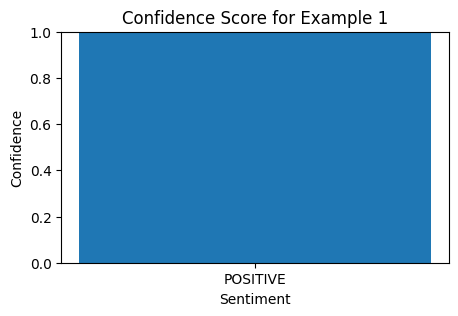

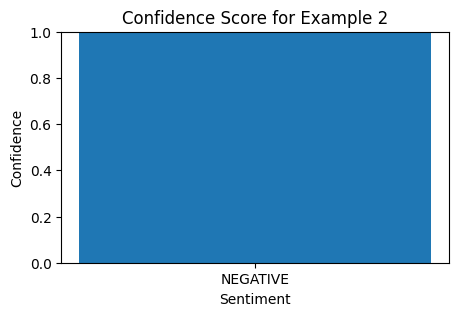

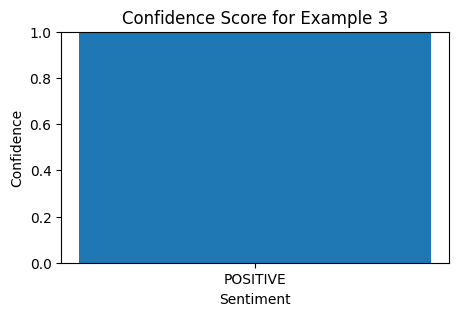

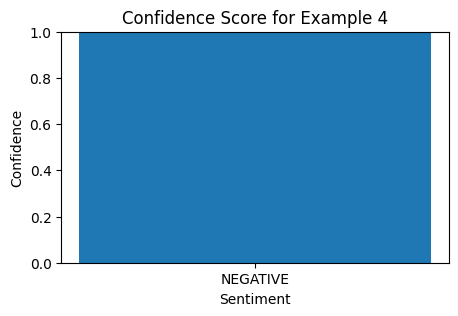

In [ ]:
# Visualize Sentiment Probabilities
print("\nPlotting prediction confidence scores...")
for idx, pred in enumerate(predictions):
    plt.figure(figsize=(5, 3))
    plt.bar([pred['label']], [pred['score']])
    plt.title(f"Confidence Score for Example {idx+1}")
    plt.xlabel("Sentiment")
    plt.ylabel("Confidence")
    plt.ylim(0, 1)
    plt.show()
